# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Ata.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,31.0
2021-06-02,31.0
2021-06-03,31.0
2021-06-04,31.0
2021-06-05,31.0
...,...
2022-11-26,60.5
2022-11-27,61.5
2022-11-28,61.5


In [6]:
df.dropna()

,Price
Date,
2021-06-01,31.0
2021-06-02,31.0
2021-06-03,31.0
2021-06-04,31.0
2021-06-05,31.0
...,...
2022-11-26,60.5
2022-11-27,61.5
2022-11-28,61.5


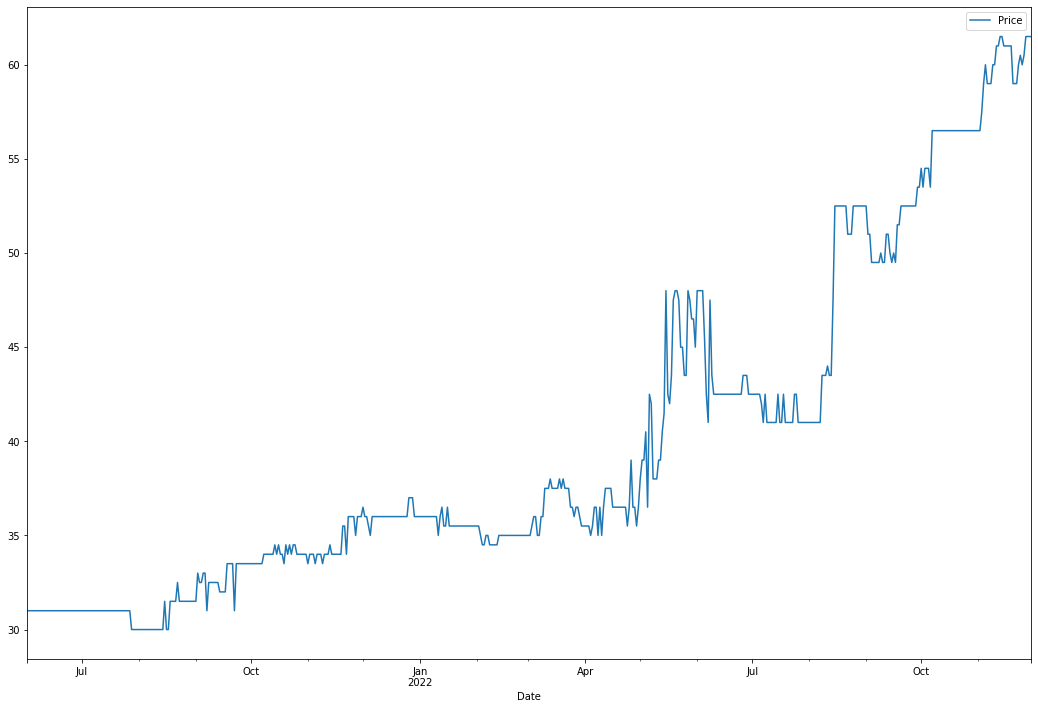

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

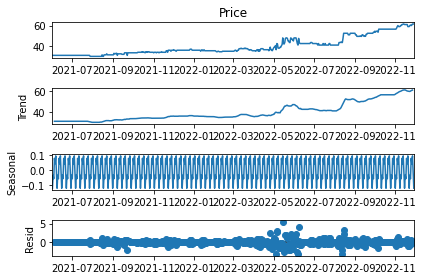

In [9]:
results.plot();

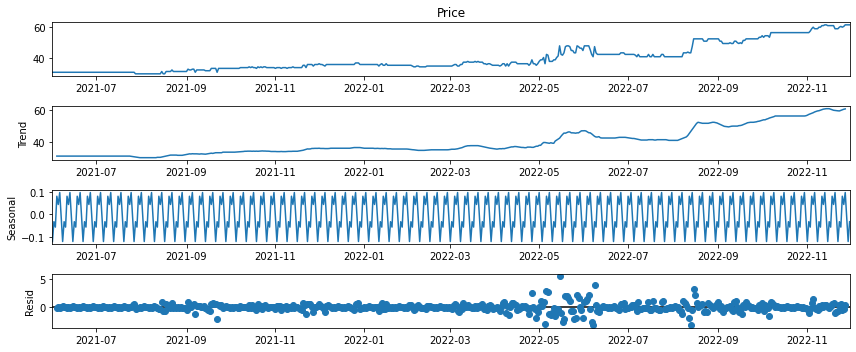

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

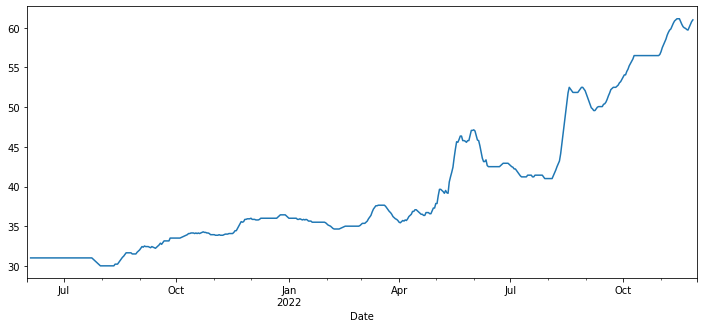

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,31.0
2021-06-02,31.0
2021-06-03,31.0
2021-06-04,31.0
2021-06-05,31.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    56.635741
2022-10-15    56.729503
2022-10-16    57.260745
2022-10-17    56.948256
2022-10-18    57.104511
2022-10-19    57.229513
2022-10-20    57.073268
2022-10-21    56.823266
2022-10-22    56.917011
2022-10-23    57.042021
2022-10-24    57.289324
2022-10-25    57.171681
2022-10-26    57.024625
2022-10-27    57.112851
2022-10-28    57.083450
2022-10-29    57.406984
2022-10-30    57.436399
2022-10-31    57.465810
2022-11-01    56.995230
2022-11-02    57.436405
2022-11-03    57.201115
2022-11-04    56.701115
2022-11-05    57.289351
2022-11-06    57.201121
2022-11-07    57.230528
2022-11-08    57.524649
2022-11-09    57.465830
2022-11-10    57.495234
2022-11-11    58.024659
2022-11-12    58.112894
2022-11-13    58.179701
2022-11-14    58.273463
2022-11-15    58.804705
2022-11-16    58.492216
2022-11-17    58.648471
2022-11-18    58.773473
2022-11-19    58.617228
2022-11-20    58.367227
2022-11-21    58.460971
2022-11-22    58.585981
2022-11-23    58.833284
2022-11-24    58

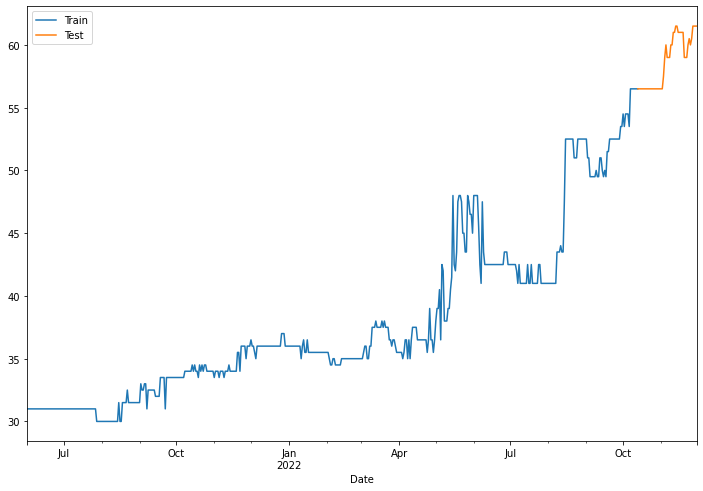

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,58.653061
std,2.054477
min,56.500000
25%,56.500000
50%,59.000000
75%,61.000000
max,61.500000


In [28]:
mean_absolute_error(test_data,test_predictions)


1.4134060350882267

In [29]:
mean_squared_error(test_data, test_predictions)

2.8681669626309185

In [26]:
from statsmodels.tools.eval_measures import rmse

In [30]:
rmse(test_data, test_predictions)

array([2.86431791, 2.79907368, 2.46440258, 2.65350631, 2.55592345,
       2.48218172, 2.57497234, 2.73548618, 2.67368787, 2.59426019,
       2.44836968, 2.5157949 , 2.60509896, 2.55087893, 2.56873772,
       2.3848363 , 2.36959962, 2.35463371, 2.62357413, 2.36959667,
       2.49857636, 2.81865731, 2.4483549 , 2.49857267, 2.48159971,
       2.32552137, 2.3546239 , 2.33993573, 2.12829145, 2.10392866,
       2.08777524, 2.06853344, 2.03905159, 2.03975651, 2.03341009,
       2.03696698, 2.03372062, 2.05339645, 2.04245789, 2.03451106,
       2.04137598, 2.03436765, 2.0351589 , 2.03340837, 2.03356669,
       2.0551082 , 2.0595775 , 2.06445564, 2.03659084])

In [31]:
np.sqrt(mean_squared_error(test_data, test_predictions))

1.6935663443251694

In [33]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [34]:
forecast_predictions = final_model.forecast(60)

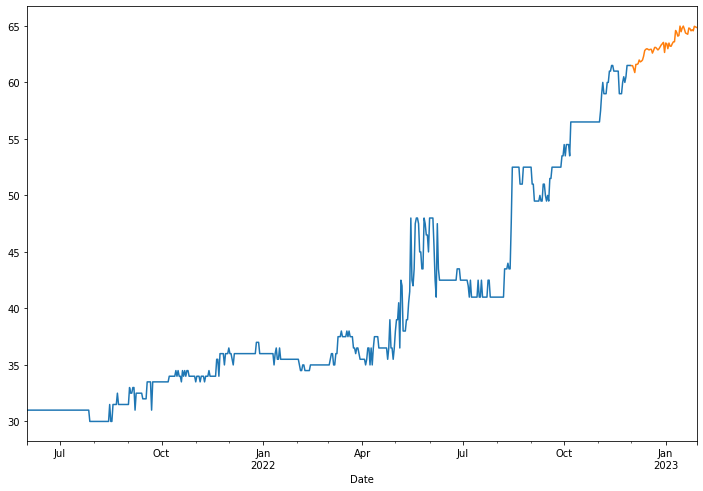

In [35]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [36]:
forecast_predictions

2022-12-01    61.483838
2022-12-02    61.483826
2022-12-03    61.206060
2022-12-04    60.872732
2022-12-05    61.594936
2022-12-06    61.594921
2022-12-07    61.650476
2022-12-08    61.983801
2022-12-09    61.817091
2022-12-10    61.872657
2022-12-11    61.983732
2022-12-12    62.317062
2022-12-13    62.817027
2022-12-14    62.928123
2022-12-15    62.983636
2022-12-16    62.928063
2022-12-17    62.872488
2022-12-18    62.928025
2022-12-19    62.928005
2022-12-20    62.594655
2022-12-21    62.816852
2022-12-22    63.094592
2022-12-23    63.094576
2022-12-24    62.983470
2022-12-25    62.872338
2022-12-26    62.983449
2022-12-27    63.150102
2022-12-28    63.316803
2022-12-29    63.427918
2022-12-30    63.539049
2022-12-31    62.650189
2023-01-01    63.483545
2023-01-02    63.428002
2023-01-03    62.983595
2023-01-04    63.483613
2023-01-05    63.205862
2023-01-06    63.205898
2023-01-07    63.428149
2023-01-08    63.594860
2023-01-09    63.594901
2023-01-10    64.594922
2023-01-11    64

# *SARIMA*

In [37]:
from datetime import datetime

In [38]:
df_KN = pd.read_csv('Ata.csv', index_col = 'Date', parse_dates = True)

In [39]:
df_KN.index.freq ='D'

In [40]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [41]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [42]:
adf_test(df_KN['Price'])

ADF Statistics: 0.585459729933294
p- value: 0.9872516989936742
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [44]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,31.0,NaN
2021-06-02,31.0,0.0
2021-06-03,31.0,0.0
2021-06-04,31.0,0.0
2021-06-05,31.0,0.0


In [45]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: 0.585459729933294
p- value: 0.9872516989936742
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [46]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [47]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.08590741808284
p- value: 1.155617742721149e-17
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [48]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [49]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.7776756834595995
p- value: 5.999393564766157e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


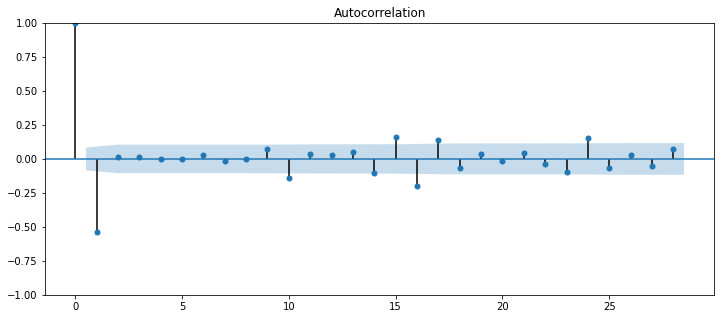

In [50]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

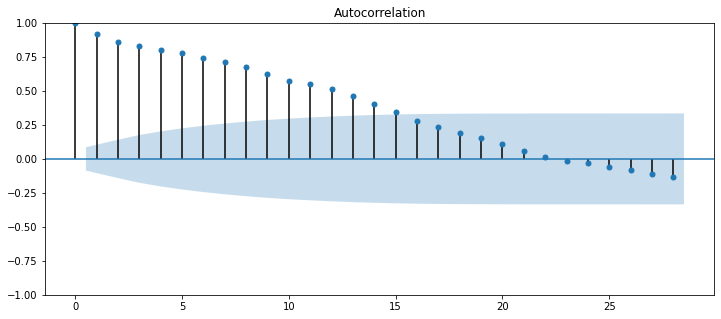

In [51]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

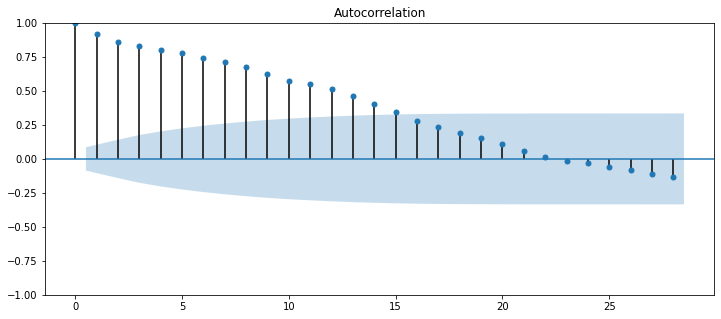

In [52]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

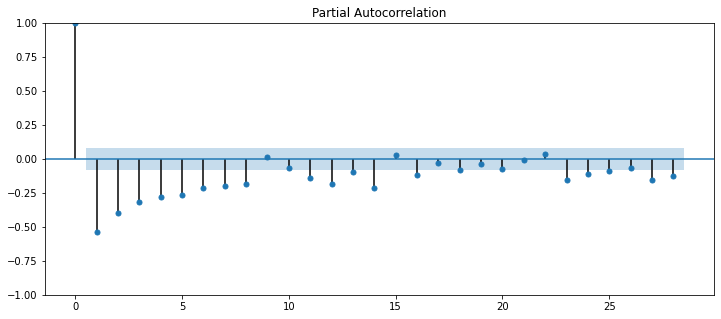

In [53]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [54]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [55]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [56]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [57]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,53.5,-1.0,-2.0,2.5
2022-10-03,54.5,1.0,2.0,3.5
2022-10-04,54.5,0.0,-1.0,5.0
2022-10-05,54.5,0.0,0.0,5.0
2022-10-06,53.5,-1.0,-1.0,4.0
2022-10-07,56.5,3.0,4.0,7.0
2022-10-08,56.5,0.0,-3.0,7.0
2022-10-09,56.5,0.0,0.0,6.5
2022-10-10,56.5,0.0,0.0,7.0


In [58]:
import statsmodels.api as sm

In [59]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from pmdarima import ARIMA

In [62]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,31.0,NaN,NaN,NaN
2021-06-02,31.0,0.0,NaN,NaN
2021-06-03,31.0,0.0,0.0,NaN
2021-06-04,31.0,0.0,0.0,NaN
2021-06-05,31.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,52.5,0.0,0.0,0.0
2022-09-28,52.5,0.0,0.0,0.0
2022-09-29,53.5,1.0,1.0,1.0


In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
model_SARIMA=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [65]:
model_SARIMA_fit=model_SARIMA.fit()

In [66]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood                -775.200
Date:                             Fri, 06 Jan 2023   AIC                           1568.401
Time:                                     20:11:26   BIC                           1605.542
Sample:                                 06-01-2021   HQIC                          1583.029
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9542      0.037     25.849      0.000       0.882       1.027
ar.L2          0.8583      0.026     32.918      0.000       0.807       0.909
ar.L3         -0.8339      0.038    -21.982      0.000      -0.908      -0.760
ma.L1         -0.1523      0.075     -2.023      0.043      -0.300      -0.005
ma.L2         -1.1246      0.084    -13.339      0.000      -1.290      -0.959
ma.L3          0.1313      0.041      3.195      0.001       0.051       0.212
ma.L4          0.2425      0.038      6.313      0.000       0.167       0.318
ma.L5          0.1383      0.039      3.545      0.000       0.062       0.215
sigma2         1.6178      0.097     16.648      0.000       1.427       1.808
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              1319.13
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               9.47   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [68]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarima

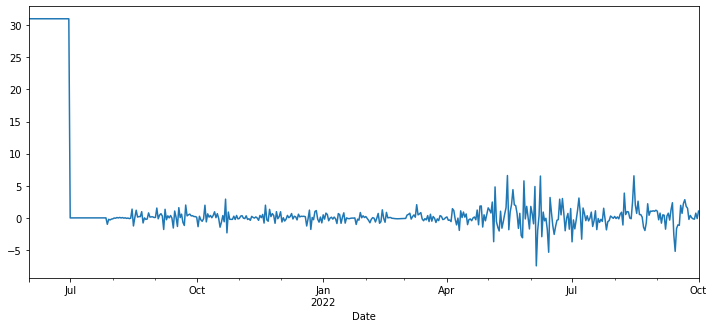

In [69]:
model_SARIMA_fit.resid.plot()

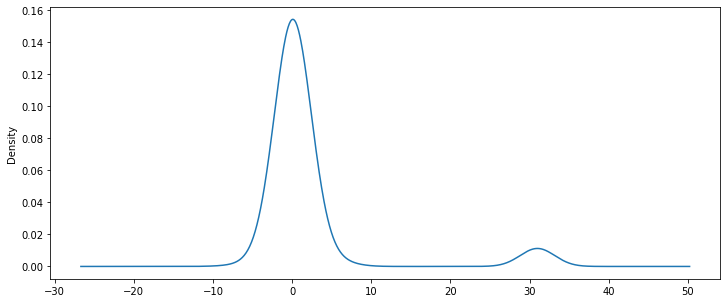

In [70]:
model_SARIMA_fit.resid.plot(kind='kde')

In [71]:
test_data['Predicted_SARIMA']=pred_Sarima

In [72]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMA
Date,,,,,
2022-10-02,53.5,-1.0,-2.0,2.5,52.913650
2022-10-03,54.5,1.0,2.0,3.5,52.655132
2022-10-04,54.5,0.0,-1.0,5.0,51.270666
2022-10-05,54.5,0.0,0.0,5.0,51.257453
2022-10-06,53.5,-1.0,-1.0,4.0,51.463167
2022-10-07,56.5,3.0,4.0,7.0,51.405221
2022-10-08,56.5,0.0,-3.0,7.0,51.537519
2022-10-09,56.5,0.0,0.0,6.5,51.942478
2022-10-10,56.5,0.0,0.0,7.0,51.513667


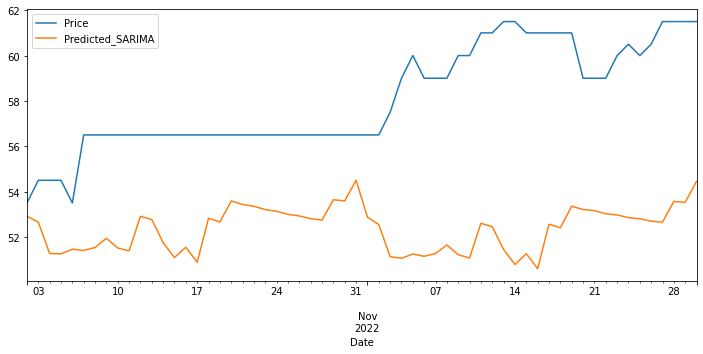

In [73]:
test_data[['Price','Predicted_SARIMA']].plot()

In [74]:
pred_Sarima

2022-10-02    52.913650
2022-10-03    52.655132
2022-10-04    51.270666
2022-10-05    51.257453
2022-10-06    51.463167
2022-10-07    51.405221
2022-10-08    51.537519
2022-10-09    51.942478
2022-10-10    51.513667
2022-10-11    51.389697
2022-10-12    52.911762
2022-10-13    52.767044
2022-10-14    51.751269
2022-10-15    51.093601
2022-10-16    51.550291
2022-10-17    50.886785
2022-10-18    52.825071
2022-10-19    52.661955
2022-10-20    53.589682
2022-10-21    53.432172
2022-10-22    53.355861
2022-10-23    53.208116
2022-10-24    53.132982
2022-10-25    52.998107
2022-10-26    52.928120
2022-10-27    52.808224
2022-10-28    52.746217
2022-10-29    53.642498
2022-10-30    53.590286
2022-10-31    54.503146
2022-11-01    52.875321
2022-11-02    52.545970
2022-11-03    51.130980
2022-11-04    51.062429
2022-11-05    51.248204
2022-11-06    51.149187
2022-11-07    51.271327
2022-11-08    51.647968
2022-11-09    51.217664
2022-11-10    51.076433
2022-11-11    52.604360
2022-11-12    52

In [75]:
predicted_value_SARIMA = pred_Sarima

In [76]:
predicted_value_SARIMA = model_SARIMA_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [77]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMA'])

5.702108519889308

In [78]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMA'])

38.704120242314325

In [79]:
rmse(test_data['Predicted_SARIMA'], test_data['Price'])

6.221263556731408

# ***FB Prophet***

In [80]:
df_fb  = pd.read_csv('Ata.csv')

In [81]:
df_fb.columns = ['ds', 'y']

In [82]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [83]:
df_fb.head()

,ds,y
0,2021-06-01,31.0
1,2021-06-02,31.0
2,2021-06-03,31.0
3,2021-06-04,31.0
4,2021-06-05,31.0


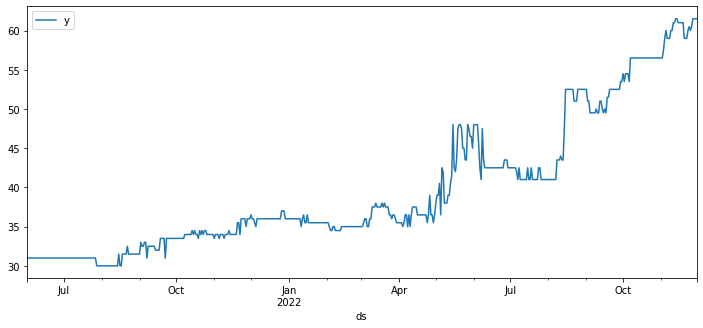

In [84]:
df_fb.plot(x='ds', y='y')

In [85]:
len(df_fb)

548

In [86]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [87]:
import prophet

In [88]:
import io, os, sys, setuptools, tokenize

In [89]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from fbprophet import Prophet

In [91]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,57.091851,54.368374,59.860548,56.688237,57.496951,0.017058,0.017058,0.017058,0.017058,0.017058,0.017058,0.0,0.0,0.0,57.108909
544,2022-11-27,57.184408,54.766069,59.969856,56.774575,57.605737,0.094694,0.094694,0.094694,0.094694,0.094694,0.094694,0.0,0.0,0.0,57.279102
545,2022-11-28,57.276966,54.598793,59.845964,56.861122,57.702001,-0.015330,-0.015330,-0.015330,-0.015330,-0.015330,-0.015330,0.0,0.0,0.0,57.261636
546,2022-11-29,57.369523,54.614325,59.837056,56.946842,57.802160,-0.103606,-0.103606,-0.103606,-0.103606,-0.103606,-0.103606,0.0,0.0,0.0,57.265918
547,2022-11-30,57.462081,54.548208,60.085470,57.023903,57.907899,-0.019509,-0.019509,-0.019509,-0.019509,-0.019509,-0.019509,0.0,0.0,0.0,57.442571


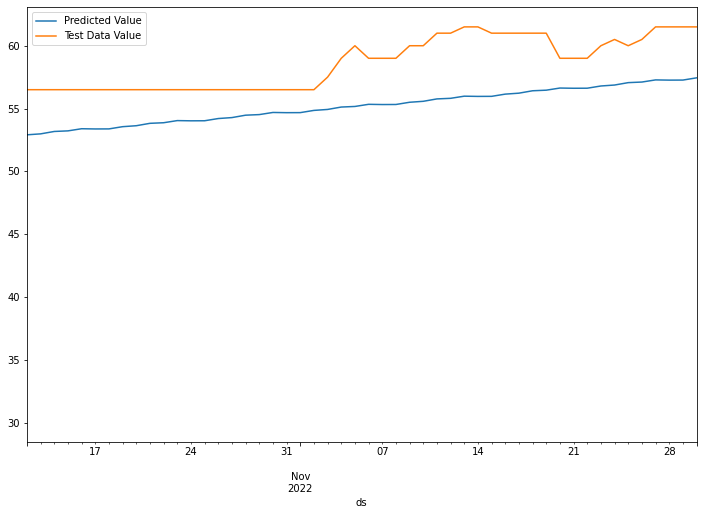

In [93]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [94]:
from statsmodels.tools.eval_measures import rmse

In [95]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [96]:
predictions_fb

488    52.095880
489    52.078414
490    52.082695
491    52.259349
492    52.335657
493    52.526426
494    52.573589
495    52.743783
496    52.726316
497    52.730598
498    52.907252
499    52.983560
500    53.174329
501    53.221492
502    53.391686
503    53.374219
504    53.378501
505    53.555155
506    53.631462
507    53.822231
508    53.869395
509    54.039589
510    54.022122
511    54.026404
512    54.203058
513    54.279365
514    54.470134
515    54.517297
516    54.687491
517    54.670025
518    54.674307
519    54.850960
520    54.927268
521    55.118037
522    55.165200
523    55.335394
524    55.317928
525    55.322209
526    55.498863
527    55.575171
528    55.765940
529    55.813103
530    55.983297
531    55.965830
532    55.970112
533    56.146766
534    56.223073
535    56.413843
536    56.461006
537    56.631200
538    56.613733
539    56.618015
540    56.794669
541    56.870976
542    57.061745
543    57.108909
544    57.279102
545    57.261636
546    57.2659

In [97]:
test_fb

,ds,y
488,2022-10-02,53.5
489,2022-10-03,54.5
490,2022-10-04,54.5
491,2022-10-05,54.5
492,2022-10-06,53.5
493,2022-10-07,56.5
494,2022-10-08,56.5
495,2022-10-09,56.5
496,2022-10-10,56.5
497,2022-10-11,56.5


In [100]:
mean_absolute_error(test_fb['y'], predictions_fb)

3.3274290991605073

In [99]:
mean_squared_error(test_fb['y'], predictions_fb)

12.252273015315962

In [98]:
rmse(predictions_fb, test_fb['y'])

3.5003247014121364

In [101]:
test_fb.mean()

y    58.058333
dtype: float64

In [102]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [103]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [104]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,43.037816,41.064967,45.158318,41.0,2022-08-02
1,2022-08-04,43.021301,40.942118,44.895509,41.0,2022-08-02
2,2022-08-05,43.193905,41.205616,45.125954,41.0,2022-08-02
3,2022-08-06,43.186174,41.205421,45.214588,41.0,2022-08-02
4,2022-08-07,43.285008,41.262568,45.301976,41.0,2022-08-02


In [106]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,3.871190,1.967534,1.857080,0.045197,0.051512,0.333333
1,7 days,3.220705,1.794632,1.600741,0.038828,0.051311,0.500000
2,8 days,2.556193,1.598810,1.316188,0.031814,0.032405,0.500000
3,9 days,1.868945,1.367093,1.088954,0.026042,0.015182,0.666667
4,10 days,1.076540,1.037564,0.750907,0.017760,0.010552,0.833333
5,11 days,0.210902,0.459241,0.397677,0.009106,0.008417,1.000000
6,12 days,2.938208,1.714120,1.005762,0.021773,0.009354,0.833333
7,13 days,17.218971,4.149575,2.467479,0.049287,0.013046,0.666667
8,14 days,31.777878,5.637187,3.973744,0.077771,0.052246,0.500000
9,15 days,45.664851,6.757577,5.362958,0.103723,0.130101,0.333333


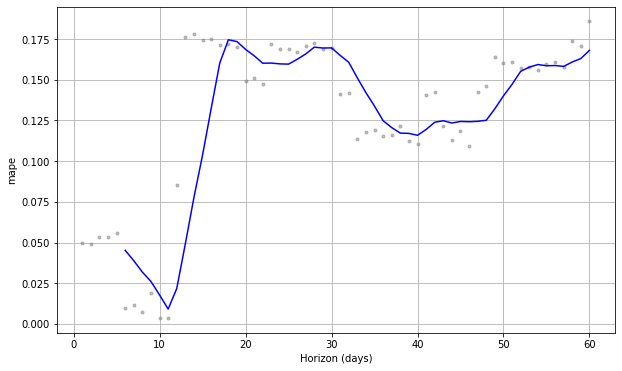

In [107]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [108]:
df_t = pd.read_csv('Ata.csv')

In [109]:
df_t.columns = ['ds', 'y']

In [110]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [111]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [112]:
t.fit(df_t)

In [113]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

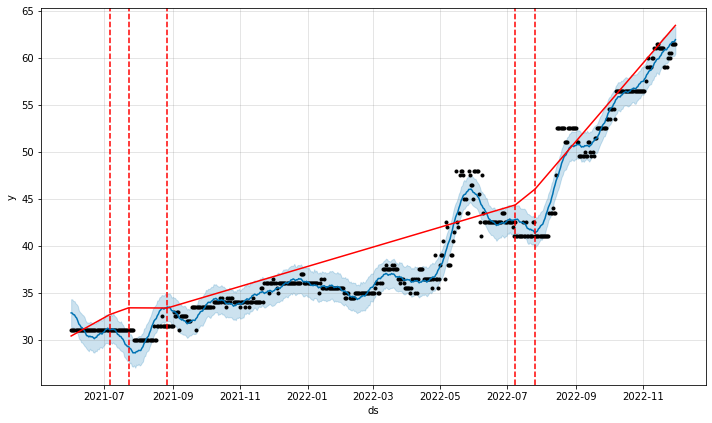

In [114]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [115]:
df_S = pd.read_csv('Ata.csv')

In [116]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


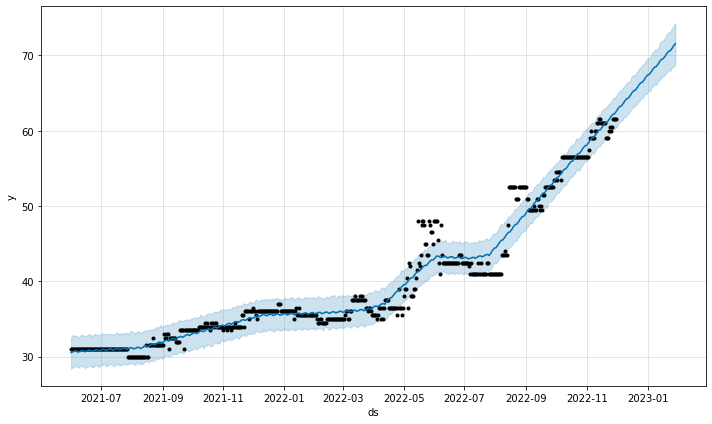

In [117]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

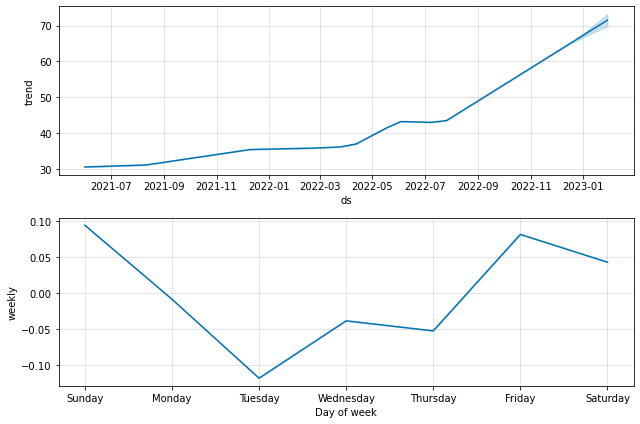

In [118]:
figure = S.plot_components(forecast);

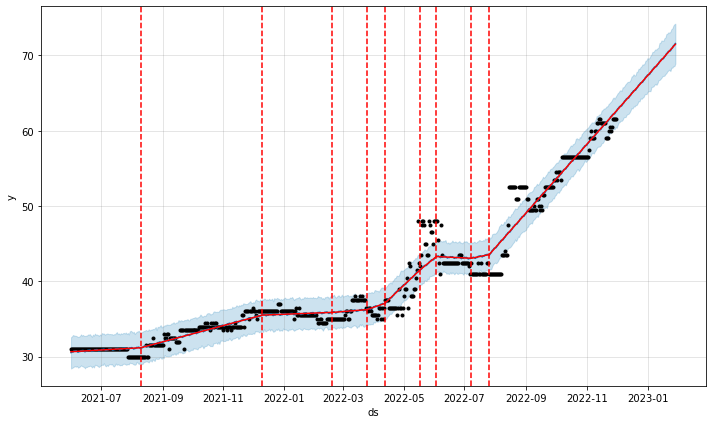

In [119]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


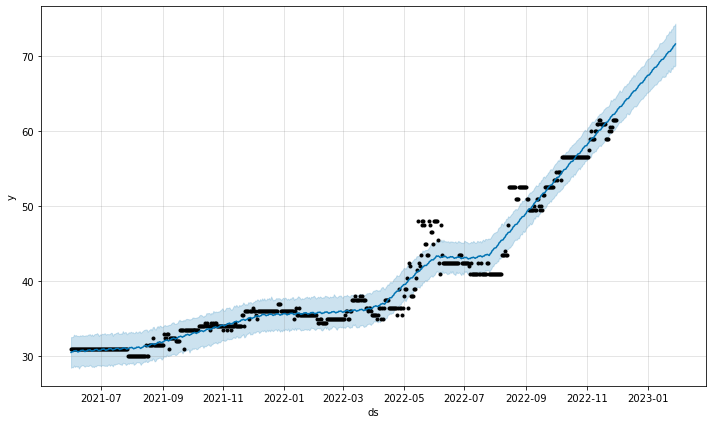

In [120]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

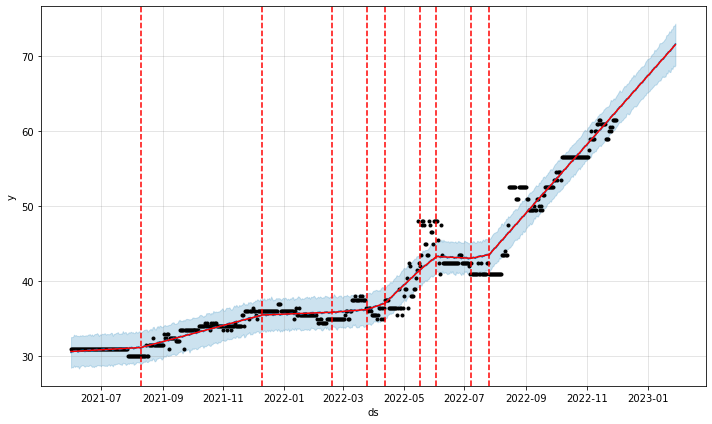

In [121]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

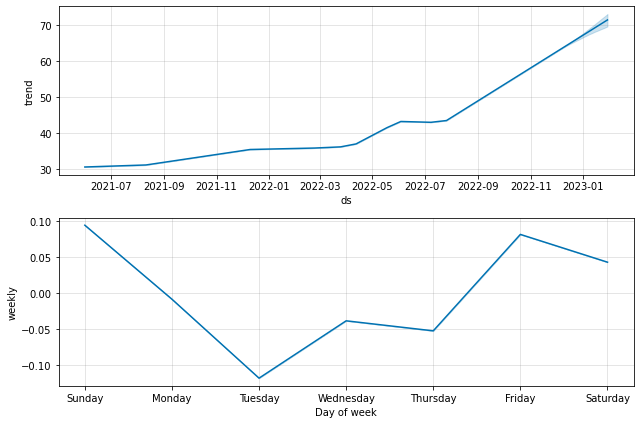

In [122]:
figure = S.plot_components(forecast)

# ***LSTM***

In [123]:
df_LSTM=pd.read_csv("Ata.csv",parse_dates=["Date"],index_col=[0])

In [124]:
print(df_LSTM.index.freq)

None


In [125]:
test_split=round(len(df_LSTM)*0.20)

In [126]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [127]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [128]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [129]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [130]:
df_for_training_scaled

array([[0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.055

In [131]:
df_for_training_scaled.shape

(438, 1)

In [132]:
df_for_testing_scaled.shape

(110, 1)

In [133]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [134]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [135]:
trainX.shape

(408, 30, 1)

In [136]:
testX,testY=createXY(df_for_testing_scaled,30)

In [137]:
trainX[0]

array([[0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556],
       [0.05555556]])

In [138]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [139]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [140]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]
 [0.05555556]]

trainY[0]--  0.05555555555555558


In [141]:
trainY[0]

0.05555555555555558

In [142]:
trainY.shape

(408,)

In [143]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20,24,28,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [144]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 10s 203ms/step - loss: 0.0953 - val_loss: 0.0471
Epoch 2/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0232 - val_loss: 0.1979
Epoch 3/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0159 - val_loss: 0.0817
Epoch 4/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0137 - val_loss: 0.1364
Epoch 5/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0122 - val_loss: 0.0726
Epoch 6/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0116 - val_loss: 0.0544
Epoch 7/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0109 - val_loss: 0.0390
Epoch 8/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0102 - val_loss: 0.0280
Epoch 9/32
13/13 [==============================] - 0s 36ms/step - loss: 0.0118 - val_loss: 0.0531
Epoch 10/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0113 - val_loss: 0.0840
Epoch 1

In [145]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 32, 'optimizer': 'adam'}

In [146]:
my_model=grid_search.best_estimator_.model

In [147]:
my_model

In [148]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 12ms/step


In [149]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.0111291]
 [1.02343  ]
 [1.0398525]
 [1.0490766]
 [1.0509937]
 [1.0530186]
 [1.0502979]
 [1.0612645]
 [1.0759542]
 [1.0988503]
 [1.1222504]
 [1.1427994]
 [1.1588929]
 [1.1699892]
 [1.1765891]
 [1.1794587]
 [1.179523 ]
 [1.1776899]
 [1.1827214]
 [1.189166 ]
 [1.2034607]
 [1.210637 ]
 [1.222348 ]
 [1.2333472]
 [1.2422775]
 [1.2406061]
 [1.2590158]
 [1.28099  ]
 [1.30194  ]
 [1.3193828]
 [1.3322408]
 [1.3404024]
 [1.3446138]
 [1.3458233]
 [1.344895 ]
 [1.3425794]
 [1.339639 ]
 [1.3363892]
 [1.3333524]
 [1.3306586]
 [1.328489 ]
 [1.3268588]
 [1.3257304]
 [1.3250368]
 [1.3246974]
 [1.32463  ]
 [1.3247592]
 [1.3250194]
 [1.3252847]
 [1.325599 ]
 [1.3258591]
 [1.3261975]
 [1.3264438]
 [1.334863 ]
 [1.357254 ]
 [1.3900869]
 [1.4137793]
 [1.4311061]
 [1.4422938]
 [1.4566786]
 [1.468512 ]
 [1.4854454]
 [1.5004385]
 [1.5161942]
 [1.5287558]
 [1.5332012]
 [1.5333111]
 [1.5306821]
 [1.5266018]
 [1.5220159]
 [1.5006893]
 [1.4773477]
 [1.4559076]
 [1.4466668]
 [1.4475032]
 [1.4487298]


In [150]:
scaler.inverse_transform(prediction)

array([[48.200325],
       [48.421738],
       [48.717346],
       [48.88338 ],
       [48.91789 ],
       [48.954334],
       [48.90536 ],
       [49.102764],
       [49.367176],
       [49.779305],
       [50.20051 ],
       [50.57039 ],
       [50.860073],
       [51.059807],
       [51.178604],
       [51.230255],
       [51.231415],
       [51.198418],
       [51.288986],
       [51.404987],
       [51.662292],
       [51.791466],
       [52.002266],
       [52.20025 ],
       [52.360992],
       [52.33091 ],
       [52.662285],
       [53.05782 ],
       [53.43492 ],
       [53.74889 ],
       [53.980335],
       [54.127243],
       [54.20305 ],
       [54.22482 ],
       [54.20811 ],
       [54.16643 ],
       [54.113503],
       [54.055004],
       [54.000343],
       [53.951855],
       [53.9128  ],
       [53.88346 ],
       [53.863148],
       [53.850662],
       [53.84455 ],
       [53.84334 ],
       [53.84567 ],
       [53.85035 ],
       [53.855125],
       [53.860783],


In [151]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [152]:
prediction_copies_array.shape

(80, 1)

In [153]:
prediction_copies_array

array([[1.0111291],
       [1.02343  ],
       [1.0398525],
       [1.0490766],
       [1.0509937],
       [1.0530186],
       [1.0502979],
       [1.0612645],
       [1.0759542],
       [1.0988503],
       [1.1222504],
       [1.1427994],
       [1.1588929],
       [1.1699892],
       [1.1765891],
       [1.1794587],
       [1.179523 ],
       [1.1776899],
       [1.1827214],
       [1.189166 ],
       [1.2034607],
       [1.210637 ],
       [1.222348 ],
       [1.2333472],
       [1.2422775],
       [1.2406061],
       [1.2590158],
       [1.28099  ],
       [1.30194  ],
       [1.3193828],
       [1.3322408],
       [1.3404024],
       [1.3446138],
       [1.3458233],
       [1.344895 ],
       [1.3425794],
       [1.339639 ],
       [1.3363892],
       [1.3333524],
       [1.3306586],
       [1.328489 ],
       [1.3268588],
       [1.3257304],
       [1.3250368],
       [1.3246974],
       [1.32463  ],
       [1.3247592],
       [1.3250194],
       [1.3252847],
       [1.325599 ],


In [154]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [155]:
pred

array([48.200325, 48.421738, 48.717346, 48.88338 , 48.91789 , 48.954334,
       48.90536 , 49.102764, 49.367176, 49.779305, 50.20051 , 50.57039 ,
       50.860073, 51.059807, 51.178604, 51.230255, 51.231415, 51.198418,
       51.288986, 51.404987, 51.662292, 51.791466, 52.002266, 52.20025 ,
       52.360992, 52.33091 , 52.662285, 53.05782 , 53.43492 , 53.74889 ,
       53.980335, 54.127243, 54.20305 , 54.22482 , 54.20811 , 54.16643 ,
       54.113503, 54.055004, 54.000343, 53.951855, 53.9128  , 53.88346 ,
       53.863148, 53.850662, 53.84455 , 53.84334 , 53.84567 , 53.85035 ,
       53.855125, 53.860783, 53.865463, 53.871555, 53.875988, 54.027534,
       54.430573, 55.021564, 55.44803 , 55.75991 , 55.96129 , 56.220215,
       56.43322 , 56.738014, 57.007893, 57.291496, 57.517605, 57.597622,
       57.5996  , 57.55228 , 57.478832, 57.396286, 57.01241 , 56.59226 ,
       56.206337, 56.04    , 56.055058, 56.077137, 56.197304, 56.49052 ,
       56.80477 , 57.089684], dtype=float32)

In [156]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [157]:
pred

array([48.200325, 48.421738, 48.717346, 48.88338 , 48.91789 , 48.954334,
       48.90536 , 49.102764, 49.367176, 49.779305, 50.20051 , 50.57039 ,
       50.860073, 51.059807, 51.178604, 51.230255, 51.231415, 51.198418,
       51.288986, 51.404987, 51.662292, 51.791466, 52.002266, 52.20025 ,
       52.360992, 52.33091 , 52.662285, 53.05782 , 53.43492 , 53.74889 ,
       53.980335, 54.127243, 54.20305 , 54.22482 , 54.20811 , 54.16643 ,
       54.113503, 54.055004, 54.000343, 53.951855, 53.9128  , 53.88346 ,
       53.863148, 53.850662, 53.84455 , 53.84334 , 53.84567 , 53.85035 ,
       53.855125, 53.860783, 53.865463, 53.871555, 53.875988, 54.027534,
       54.430573, 55.021564, 55.44803 , 55.75991 , 55.96129 , 56.220215,
       56.43322 , 56.738014, 57.007893, 57.291496, 57.517605, 57.597622,
       57.5996  , 57.55228 , 57.478832, 57.396286, 57.01241 , 56.59226 ,
       56.206337, 56.04    , 56.055058, 56.077137, 56.197304, 56.49052 ,
       56.80477 , 57.089684], dtype=float32)

In [158]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [48.200325 48.421738 48.717346 48.88338  48.91789  48.954334 48.90536
 49.102764 49.367176 49.779305 50.20051  50.57039  50.860073 51.059807
 51.178604 51.230255 51.231415 51.198418 51.288986 51.404987 51.662292
 51.791466 52.002266 52.20025  52.360992 52.33091  52.662285 53.05782
 53.43492  53.74889  53.980335 54.127243 54.20305  54.22482  54.20811
 54.16643  54.113503 54.055004 54.000343 53.951855 53.9128   53.88346
 53.863148 53.850662 53.84455  53.84334  53.84567  53.85035  53.855125
 53.860783 53.865463 53.871555 53.875988 54.027534 54.430573 55.021564
 55.44803  55.75991  55.96129  56.220215 56.43322  56.738014 57.007893
 57.291496 57.517605 57.597622 57.5996   57.55228  57.478832 57.396286
 57.01241  56.59226  56.206337 56.04     56.055058 56.077137 56.197304
 56.49052  56.80477  57.089684]

Original Values--  [51.  51.  50.  49.5 50.  49.5 51.5 51.5 52.5 52.5 52.5 52.5 52.5 52.5
 52.5 52.5 52.5 53.5 53.5 54.5 53.5 54.5 54.5 54.5 53.5 56.5 56.5 56.5
 56.5 56.

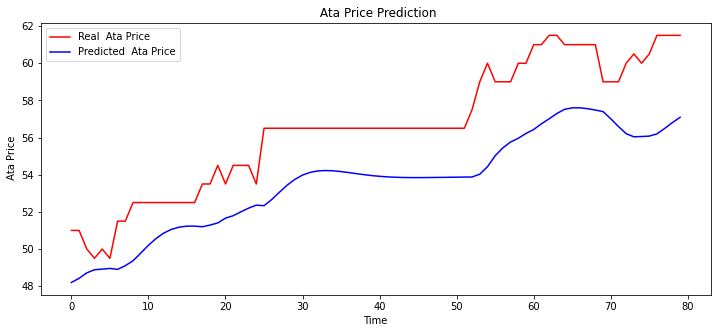

In [160]:
plt.plot(original, color = 'red', label = 'Real  Ata Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Ata Price')
plt.title(' Ata Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Ata Price')
plt.legend()
plt.show()

In [161]:
mean_absolute_error(original, pred)

2.8934226989746095

In [162]:
mean_squared_error(original, pred)

9.537507381949036

In [163]:
rmse(pred, original)

3.088285508489951